In [2]:
import pandas as pd
import numpy as np
import os
import warnings
#warnings.filterwarnings('ignore')

In [3]:
from os.path import isfile, isdir, join, splitext
from os import makedirs, listdir

input_dir = "amazon-datasets-csv" # directory with Amazon Datasets

csv_files = [join(input_dir,f) for f in listdir(input_dir) if isfile(join(input_dir, f)) and f.endswith("csv")]
category_dict = dict()

In [4]:
import re
def find_firstname(name, nan=["nan"]):
    if not isinstance(name, str):
        # shouldn't happen
        return "-"
    # filter out something like Greg and Kristin
    if ("&" in name) or (" and " in name):
        return "-"

    matches = re.findall("[a-zA-Z]+", name)
    if matches == []:
        #print(name)
        return "-"
    return matches[0].lower()

#import gender_guesser.detector as gender
import my_gender_guesser as my_gender

gd = my_gender.Detector()


In [5]:
csv_files

['amazon-datasets-csv/Gift_Cards_5.csv',
 'amazon-datasets-csv/Digital_Music_5.csv',
 'amazon-datasets-csv/Prime_Pantry_5.csv',
 'amazon-datasets-csv/Kindle_Store_5.csv',
 'amazon-datasets-csv/Tools_and_Home_Improvement_5.csv',
 'amazon-datasets-csv/Clothing_Shoes_and_Jewelry_5.csv',
 'amazon-datasets-csv/Pet_Supplies_5.csv',
 'amazon-datasets-csv/All_Beauty_5.csv',
 'amazon-datasets-csv/Sports_and_Outdoors_5.csv',
 'amazon-datasets-csv/Industrial_and_Scientific_5.csv',
 'amazon-datasets-csv/Appliances_5.csv',
 'amazon-datasets-csv/Musical_Instruments_5.csv',
 'amazon-datasets-csv/Home_and_Kitchen_5.csv',
 'amazon-datasets-csv/Grocery_and_Gourmet_Food_5.csv',
 'amazon-datasets-csv/Automotive_5.csv',
 'amazon-datasets-csv/CDs_and_Vinyl_5.csv',
 'amazon-datasets-csv/Movies_and_TV_5.csv',
 'amazon-datasets-csv/Software_5.csv',
 'amazon-datasets-csv/Patio_Lawn_and_Garden_5.csv',
 'amazon-datasets-csv/AMAZON_FASHION_5.csv',
 'amazon-datasets-csv/Toys_and_Games_5.csv',
 'amazon-datasets-csv/

In [5]:
# file_row_dict = dict()
# csv_files
# for file_path in csv_files:
#     filename = splitext(os.path.basename(file_path))[0]
    
#     print("------------ {0} --------------------".format(filename))
#     df = pd.read_csv(file_path, index_col=0)
#     df = df[["verified", "reviewerID", "asin", "reviewerName", "reviewText", "gender"]]    
#     df = df.dropna(subset=["reviewerID", "asin", "reviewText"])
#     #df = df.dropna(subset=["reviewText"])
#     nrows_begin = len(df)
#     print("Rows in dataframe:", nrows_begin)
    
#     df = df.drop_duplicates(subset=["reviewText"])
#     print("Filter out duplicates: ", round((len(df)/nrows_begin)*100,2), "% left")
#     nrows = len(df)
    
#     df = df[df.gender!="-"]
#     print("Filter our genderless:  ", round((len(df)/nrows_begin)*100,2), "% left.")
    
#     print("Males:   ", round((df.gender=="male").sum()*100/len(df),2), "%")
#     print("Females: ", round((df.gender=="female").sum()*100/len(df),2), "%")
 
#     print("\x1b[31mRows left:", len(df),"\x1b[0m", "   (", round((len(df)/nrows_begin)*100,2), "%)")

#     verified = len(df[df.verified==True])
#     print("Verified :", (verified/nrows_begin)*100, "%")
#     file_row_dict.update({filename:len(df)})
#     print("\n")

#     #print(df[["reviewerName", "reviewText", "gender"]].head())

In [7]:
import gender_guesser.detector as gender
import my_gender_guesser as my_gender

gdm = my_gender.Detector()
gdo = gender.Detector(case_sensitive=False)

#for i,gd in [("m",gdm),("o",gdo)]:
for i,gd in [("o",gdo)]:

    file_row_dict = dict()
    csv_files

    labels = []
    males = []
    females = []
    genderless = []
    duplicates = []
    none_duplicates = []
    nas = []
    c = 0
    for file_path in csv_files:

        filename = splitext(os.path.basename(file_path))[0]
        if  filename.split("_")[0] in ["Electronics", "Clothing", "Kindle", "Home", "Movies", "Automotive"]:
            if "Book" in filename:
                continue
            print("------------ {0} --------------------".format(filename))
            df = pd.read_csv(file_path)

            if len(df) < 300000:
                continue
            len_df = len(df)
            df = df.dropna().drop_duplicates(subset=["reviewText"])


            firstnames = df.reviewerName.apply(lambda x: find_firstname(x))
            df["gender"] = firstnames.apply(lambda fname: gd.get_gender(fname))

            df = df[["verified", "reviewerID", "asin", "reviewerName", "reviewText", "gender"]]    
            df = df.dropna(subset=["reviewerName", "reviewerID", "asin", "reviewText"])


            len_males = len(df[df.gender=="male"])
            len_females = len(df[df.gender=="female"])
            #if len_males/(len_males+len_females) > 0.65 or len_females/(len_males+len_females) >0.65:

            males.append(len_males)
            females.append(len_females)
            n_none_duplicates = len_df -len(df)
            none_duplicates.append(n_none_duplicates)
            labels.append(filename.split("_")[0])
            genderless.append(len(df[(df.gender!="male") & (df.gender!="female")]))


    import matplotlib.pyplot as plt



    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, genderless, width, label='None&Duplicates', bottom=0, color="dimgray")
    ax.bar(labels, genderless, width, label='Genderless', bottom=none_duplicates, color="darkgray")
    ax.bar(labels, males, width, label='Men', bottom=[sum(x) for x in zip(none_duplicates, genderless)], color="steelblue")
    ax.bar(labels, females, width, label='Women', color="tomato", bottom=[sum(x) for x in zip(males, genderless, none_duplicates)])


    ax.set_ylabel('Number Reviews')
    ax.set_title('Distribution Reviews')
    ax.legend()

    plt.show()

    fig.savefig(os.path.join(f"figures", f"guesser_{i}.png"), dpi=1200)



    #print(df[["reviewerName", "reviewText", "gender"]].head())

------------ Kindle_Store_5 --------------------
------------ Clothing_Shoes_and_Jewelry_5 --------------------


KeyboardInterrupt: 

------------ Gift_Cards_5 --------------------
------------ Digital_Music_5 --------------------
------------ Prime_Pantry_5 --------------------
------------ Kindle_Store_5 --------------------
------------ Tools_and_Home_Improvement_5 --------------------
------------ Clothing_Shoes_and_Jewelry_5 --------------------
------------ Pet_Supplies_5 --------------------
------------ All_Beauty_5 --------------------
------------ Sports_and_Outdoors_5 --------------------
------------ Industrial_and_Scientific_5 --------------------
------------ Appliances_5 --------------------
------------ Musical_Instruments_5 --------------------
------------ Home_and_Kitchen_5 --------------------
------------ Grocery_and_Gourmet_Food_5 --------------------
------------ Automotive_5 --------------------
------------ CDs_and_Vinyl_5 --------------------
------------ Movies_and_TV_5 --------------------
------------ Software_5 --------------------
------------ Patio_Lawn_and_Garden_5 -------------------

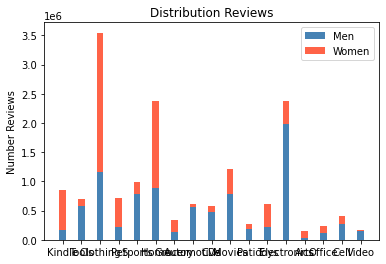

In [7]:
import gender_guesser.detector as gender
import my_gender_guesser as my_gender

gdm = my_gender.Detector()
gdo = gender.Detector(case_sensitive=False)

#for i,gd in [("m",gdm),("o",gdo)]:
for i,gd in [("o",gdo)]:

    file_row_dict = dict()
    csv_files

    labels = []
    males = []
    females = []
    genderless = []
    duplicates = []
    none_duplicates = []
    nas = []
    c = 0
    for file_path in csv_files:

        filename = splitext(os.path.basename(file_path))[0]
        #if  filename.split("_")[0] in ["Electronics", "Clothing", "Kindle", "Home", "Movies", "Automotive"]:
        if "Book" in filename:
            continue
        print("------------ {0} --------------------".format(filename))
        df = pd.read_csv(file_path)

        if len(df) < 300000:
            continue
        len_df = len(df)
        df = df.dropna().drop_duplicates(subset=["reviewText"])


        firstnames = df.reviewerName.apply(lambda x: find_firstname(x))
        df["gender"] = firstnames.apply(lambda fname: gd.get_gender(fname))

        df = df[["verified", "reviewerID", "asin", "reviewerName", "reviewText", "gender"]]    
        df = df.dropna(subset=["reviewerName", "reviewerID", "asin", "reviewText"])


        len_males = len(df[df.gender=="male"])
        len_females = len(df[df.gender=="female"])
        #if len_males/(len_males+len_females) > 0.65 or len_females/(len_males+len_females) >0.65:

        males.append(len_males)
        females.append(len_females)
        n_none_duplicates = len_df -len(df)
        none_duplicates.append(n_none_duplicates)
        labels.append(filename.split("_")[0])
        genderless.append(len(df[(df.gender!="male") & (df.gender!="female")]))


    import matplotlib.pyplot as plt



    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

#     ax.bar(labels, genderless, width, label='None&Duplicates', bottom=0, color="dimgray")
#     ax.bar(labels, genderless, width, label='Genderless', bottom=none_duplicates, color="darkgray")
    ax.bar(labels, males, width, label='Men', bottom=0, color="steelblue")
    ax.bar(labels, females, width, label='Women', color="tomato", bottom=males)


    ax.set_ylabel('Number Reviews')
    ax.set_title('Distribution Reviews')
    ax.legend()

    plt.show()

    fig.savefig(os.path.join(f"figures", f"guesser_{i}.png"), dpi=1200)



    #print(df[["reviewerName", "reviewText", "gender"]].head())

In [ ]:
categories= ["Electronics", "Clothing", "Kindle", "Home", "Movies"]

In [ ]:
def balance_gender(X, nmax, seed=20):

    nrows = len(X)  
    males = X[X.gender == "male"]
    females = X[X.gender == "female"]
    n = len(males)
    if n > len(X)/2:
        n = nrows-n
    if n > nmax:
        n = nmax
    
    nMales = males.sample(n=n, random_state=seed, replace=False)
    nFemales = females.sample(n=n, random_state=seed, replace=False)
    balanced_X = pd.concat([nMales,nFemales], axis=0)
    return balanced_X.sample(frac=1, random_state=seed, replace= False)
    

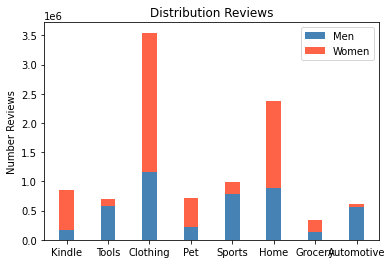

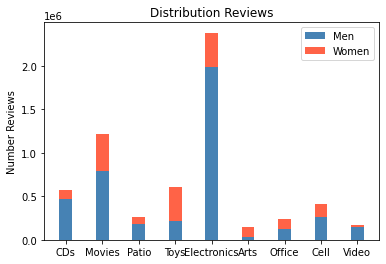

In [12]:
import matplotlib.pyplot as plt



width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
x=8

#     ax.bar(labels, genderless, width, label='None&Duplicates', bottom=0, color="dimgray")
#     ax.bar(labels, genderless, width, label='Genderless', bottom=none_duplicates, color="darkgray")
ax.bar(labels[:x], males[:x], width, label='Men', bottom=0, color="steelblue")
ax.bar(labels[:x], females[:x], width, label='Women', color="tomato", bottom=males[:x])


ax.set_ylabel('Number Reviews')
ax.set_title('Distribution Reviews')
ax.legend()

plt.show()

fig, ax = plt.subplots()


#     ax.bar(labels, genderless, width, label='None&Duplicates', bottom=0, color="dimgray")
#     ax.bar(labels, genderless, width, label='Genderless', bottom=none_duplicates, color="darkgray")
ax.bar(labels[8:], males[8:], width, label='Men', bottom=0, color="steelblue")
ax.bar(labels[8:], females[8:], width, label='Women', color="tomato", bottom=males[8:])


ax.set_ylabel('Number Reviews')
ax.set_title('Distribution Reviews')
ax.legend()

plt.show()

In [1]:
# make df_all with from all csv-file with equal males/females and max 50000

import my_gender_guesser as my_gender
# gd = my_gender.Detector()
#import gender_guesser.detector as gender
gd = gender.Detector(case_sensitive=False)

seed = 786
file_row_list = []
df_all = pd.DataFrame()

for c_id, file_path in enumerate(csv_files):
    
    filename = splitext(os.path.basename(file_path))[0]
    category_dict[c_id] = filename
    
    #print("------------ {0} --------------------".format(filename))
    df = pd.read_csv(file_path)
    df = df[df.verified == True]
    firstnames = df.reviewerName.apply(lambda x: find_firstname(x))
    df["gender"] = firstnames.apply(lambda fname: gd.get_gender(fname))
    df = df[["verified", "reviewerID", "asin", "reviewerName", "reviewText", "gender"]]    
    df = df.dropna(subset=["reviewerID", "asin", "reviewText"])
    df = df.drop_duplicates(subset=["reviewText"])
    df["category"] = filename.split("_")[0]
    
    
    df = df.sample(frac=1, random_state= seed)
    #Groupby preserves the order of rows within each groupby, so maybe need to shuffle before
    df = df.groupby(["reviewerID"]).head(10) # max (first) 10 reviews by one reviewer per category

    df = df[df.gender!="-"]
    df = df[df.gender.isin(["male", "female"])]
    
    
    
    n = 50000
    
    if len(df)<n:
        continue
    
    nrows = len(df)
    if nrows < n:
        n = nrows
    
    df = balance_gender(df, int(n/2))
    
    if len(df)<n:
        continue
    print("------------ {0} --------------------".format(filename))
    #df = df.sample(n=n, random_state=seed, replace=False)    
    
    df_all = pd.concat([df_all, df], axis=0, ignore_index=True)

    file_row_list.append((file_path,len(df)))
    
df_all = df_all.sample(frac=1, random_state=79832)

    #print(df[["reviewerName", "reviewText", "gender"]].head())

NameError: name 'gender' is not defined

In [10]:
df_all.drop_duplicates(subset=["reviewText"])
df_all = balance_gender(df_all, len(df_all))
df_all.to_csv("df_all.csv", index=False)


Might want to add category label